In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import pandas as pd
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error


In [10]:
#load first dataset

dataset = 'S1-2006'
tray = 'Tray1'

F = np.load(os.getcwd()+'\\Data\\'+dataset+'\\Model\\features_'+tray+'.npy')
Y = pd.read_excel(os.getcwd()+'\\Data\\'+dataset+'\\Model\\Leaf_Area_'+tray+'.xlsx').to_numpy()[:,1]


In [13]:
#load additional dataset if necessary

dataset2 = 'S2-2306'
tray2 = 'Tray1'

F = np.hstack([F, np.load(os.getcwd()+'\\Data\\'+dataset2+'\\Model\\features_'+tray2+'.npy')])
Y = np.hstack([Y, pd.read_excel(os.getcwd()+'\\Data\\'+dataset2+'\\Model\\Leaf_Area_'+tray2+'.xlsx').to_numpy()[:,1]])


In [15]:
#train and score least squares regression
Fls = F[:,:]#np.vstack([F[:1, :], np.ones([F.shape[1]])])
F_train, F_test, Y_train, Y_test = train_test_split(Fls.T, Y, test_size = 0.25, random_state = 0)

regr = LR()

regr.fit(F_train, Y_train)
Y_pred = regr.predict(F_test)
score = regr.score(F_test, Y_test)

perm_importance = permutation_importance(regr, F_test, Y_test)

print(perm_importance.importances_mean)

print(np.mean(cross_val_score(regr, Fls.T, Y, cv=20)))
print(np.var(cross_val_score(regr, Fls.T, Y, cv=20)))

[1.03847555 0.01938179]
0.5800374181649814
0.02690015459474061


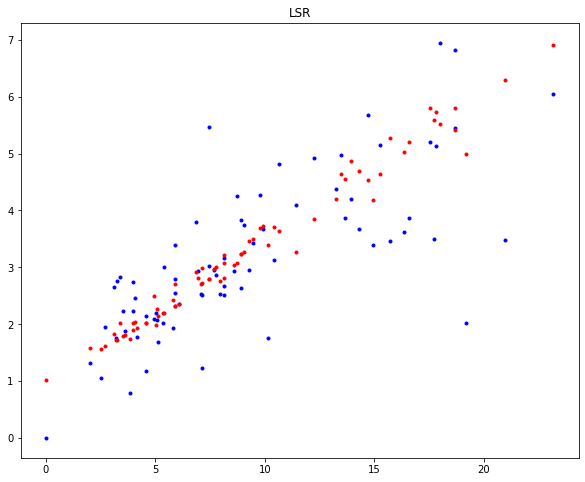

In [16]:
#plot predicted and true values of test data in scatter plot
plt.figure(figsize = (10,8))
plt.title('LSR')
plt.plot(F_test[:,0], Y_test, 'b.')
plt.plot(F_test[:,0], Y_pred, 'r.')


In [17]:
## train and score SVM regressor
Fsvm = F[:, :]
regr = SVR(kernel = 'rbf', C = 10)

F_train, F_test, Y_train, Y_test = train_test_split(Fsvm.T, Y, test_size = 0.25, random_state = 0)

regr.fit(F_train, Y_train)
Y_pred = regr.predict(F_test)
score = regr.score(F_test, Y_test)


perm_importance = permutation_importance(regr, F_test, Y_test)

print(perm_importance.importances_mean)

print(np.mean(cross_val_score(regr, Fsvm.T, Y, cv=20)))
print(np.var(cross_val_score(regr, Fsvm.T, Y, cv=20)))

[1.03331677 0.05575873]
0.5568792160266006
0.04655220539310841


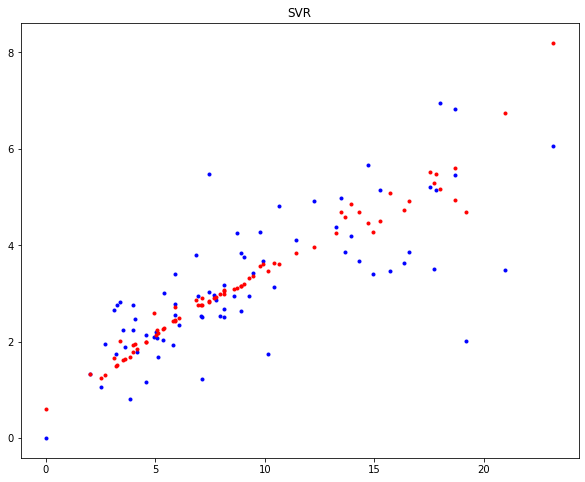

In [18]:
#plot predicted and true values of test data in scatter plot

plt.figure(figsize = (10,8))
plt.title('SVR')
plt.plot(F_test[:,0], Y_test, 'b.')
plt.plot(F_test[:,0], Y_pred, 'r.')

In [19]:
#train and score Random Forest regressor
Frfr = F[:, :]
regr = RFR(100)

F_train, F_test, Y_train, Y_test = train_test_split(Frfr.T, Y, test_size = 0.25, random_state = 0)

regr.fit(F_train, Y_train)
score = regr.score(F_test, Y_test)
Y_pred = regr.predict(F_test)

perm_importance = permutation_importance(regr, F_test, Y_test)

print(perm_importance.importances_mean)

print(np.mean(cross_val_score(regr, Fsvm.T, Y, cv=20)))
print(np.var(cross_val_score(regr, Fsvm.T, Y, cv=20)))

[1.2152122  0.05343656]
0.46910225915229137
0.05748323771310404


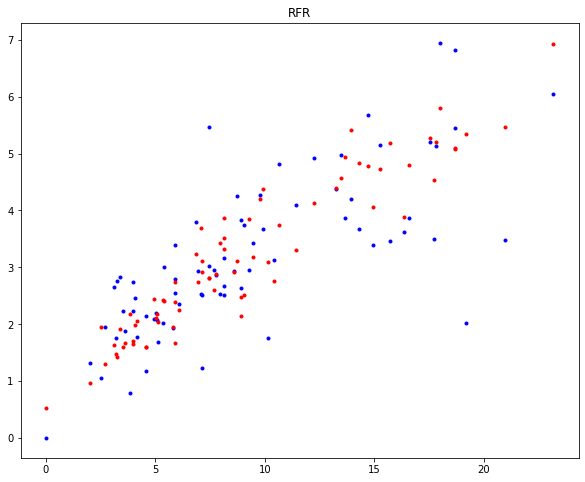

In [20]:
#plot predicted and true values of test data in scatter plot

plt.figure(figsize = (10,8))
plt.title('RFR')
plt.plot(F_test[:,0], Y_test, 'b.')
plt.plot(F_test[:,0], Y_pred, 'r.')